# Sales Data Analysis

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data loading

In [3]:
df = pd.read_csv("D:\\sales_data.csv")
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Data Cleaning

In [4]:
df = df.drop(["Unnamed: 0"],axis = 1) 
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## Descriptive statistics

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [14]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


## Exploratory Data Analysis (EDA)

#### To visualize the Numeric Columns Distribution

In [59]:
def plot_continuous_distribution(data_col):
    sns.displot(df[data_col], kde = True, height=8, aspect=1.6)
    plt.title(f'Distribution of {data_col}')
    plt.show()

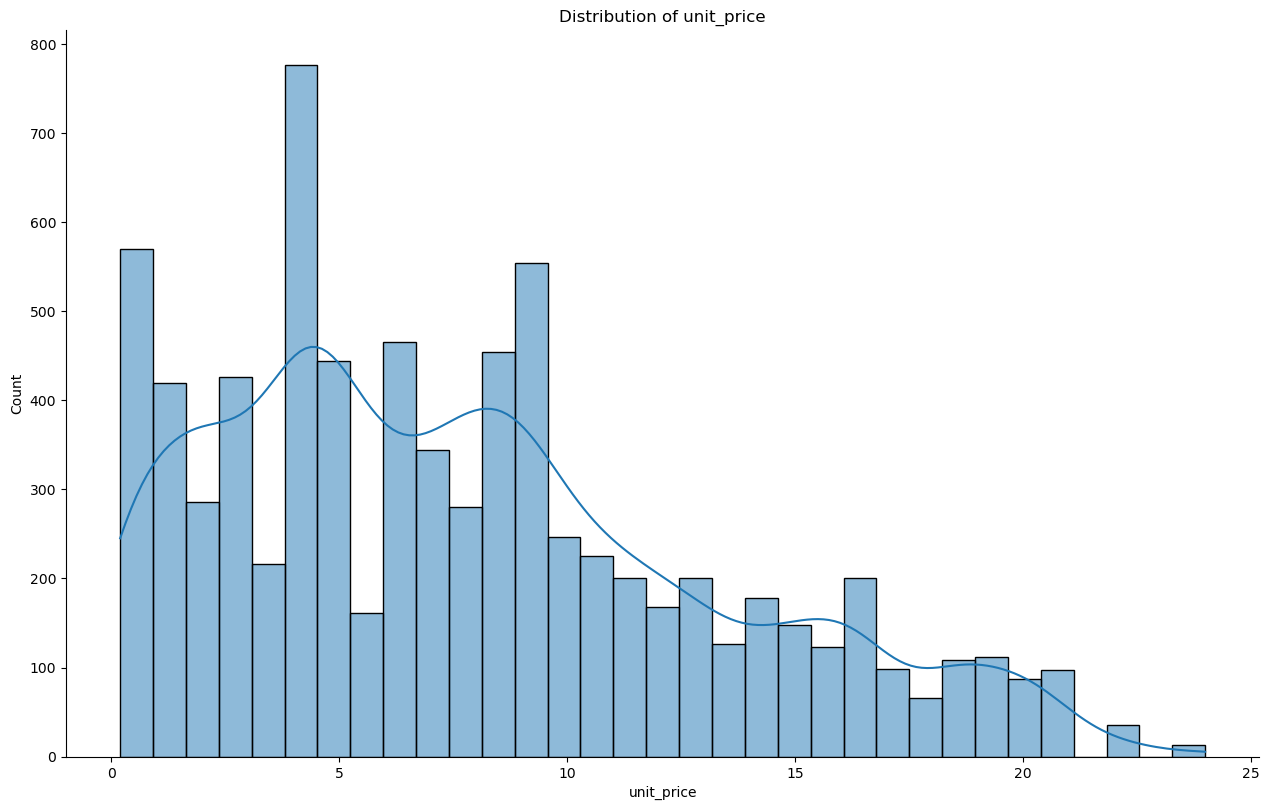

In [60]:
plot_continuous_distribution('unit_price')

#### Findings
- This indicates that the distribution of unit prices is skewed towards higher frequency of sales for products with lower unit prices, compared to those with higher unit prices.

#### Recommendations 
- Pricing strategies that attract price-sensitive customers should be implemented, including promotions, discounts on bulk purchases, and value packs for commonly purchased items.

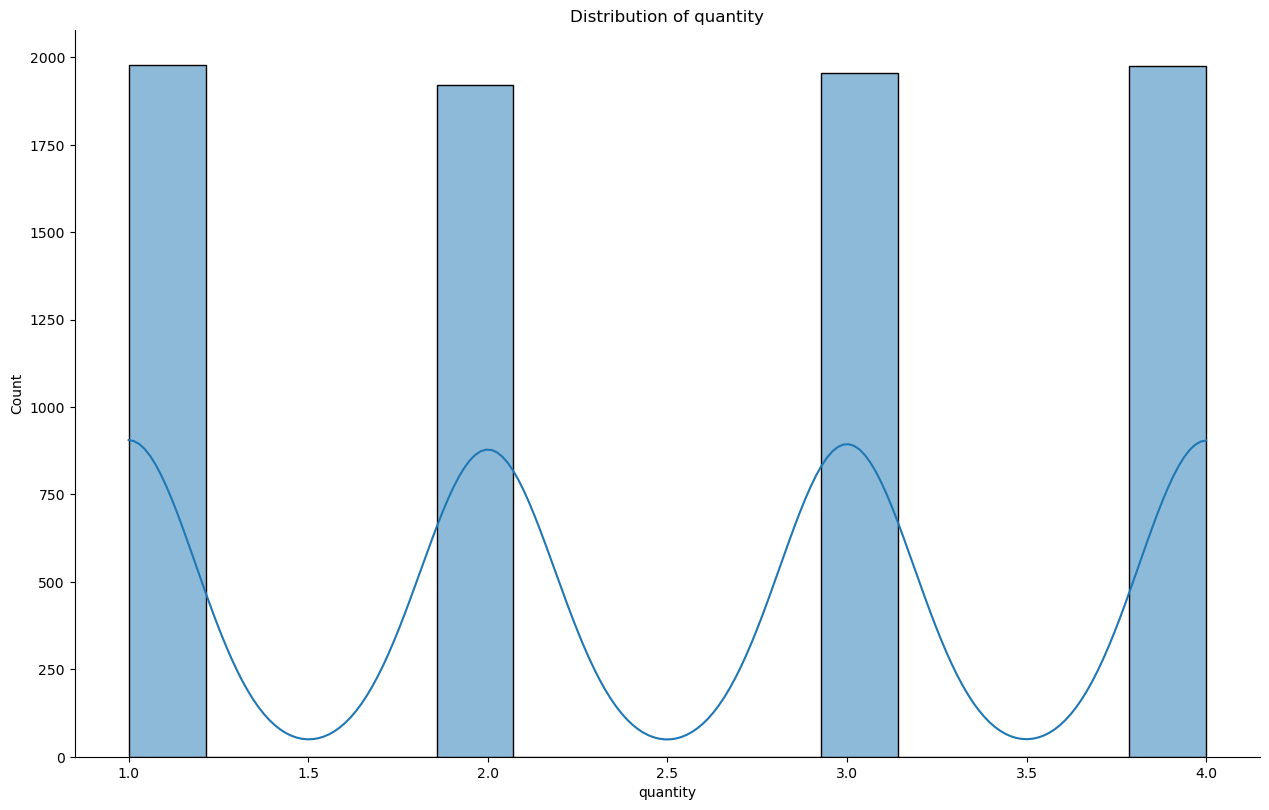

In [61]:
plot_continuous_distribution('quantity')

#### Findings
- The distribution of quantity is quite distinct. There are only 4 unique values (1, 2, 3, and 4), and they are fairly evenly distributed. This means that customers are purchasing items in quantities of 1 to 4 units fairly equally.

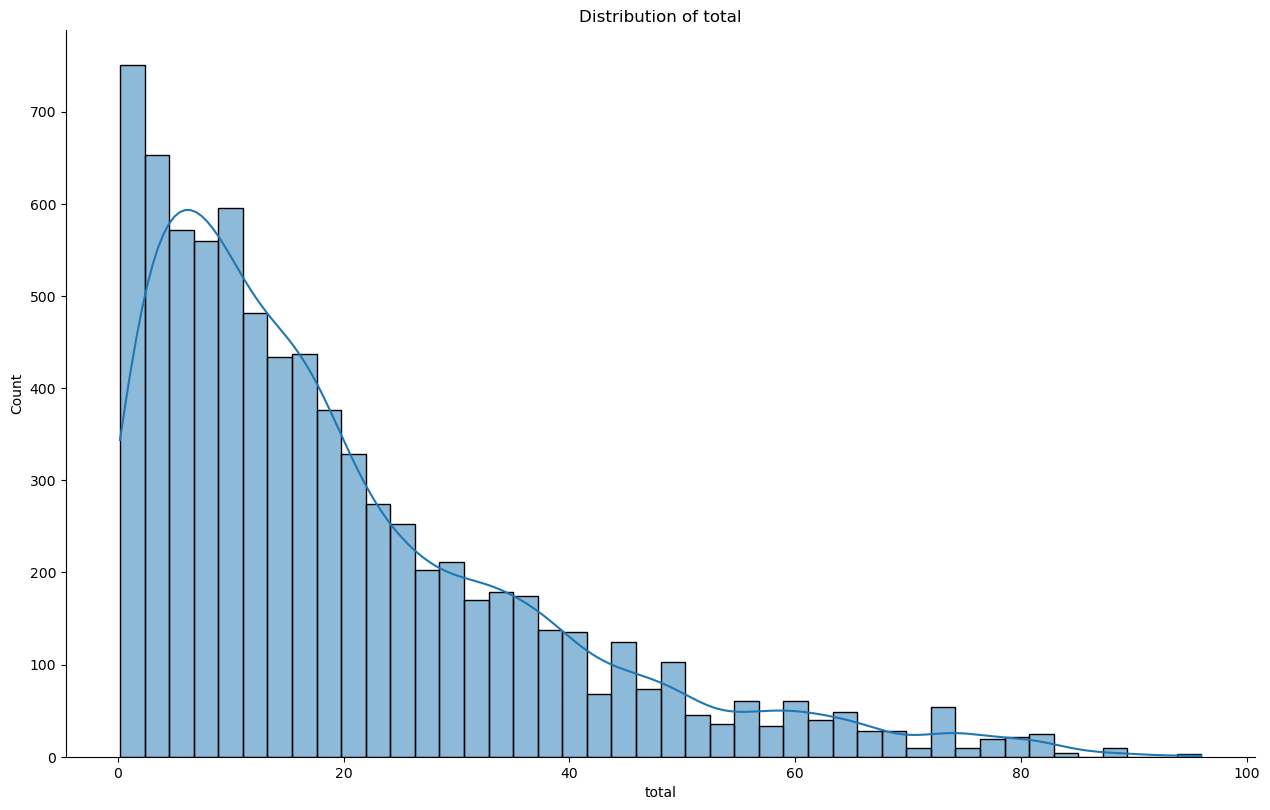

In [62]:
plot_continuous_distribution('total')

#### Findings
- The distribution is even more positively skewed. 
- Customers at a grocery store typically make numerous low-value transactions and occasionally make a transaction of high value.

#### Recommendations
- Loyalty programs should be implemented to reward frequent visits/purchases, thereby encouraging repeat business for low-value transactions.
- Personalized service and incentives should be provided for high-value transactions to enhance customer satisfaction and loyalty.

#### To Determining the Categorical Columns Data Unique Values

In [1]:
def get_unique_values(df_col):
    num_unique_values = len(df[df_col].unique())
    print(f'Column: {df_col} has {num_unique_values} unique values\n')
    print(df[df_col].value_counts())

In [83]:
get_unique_values('transaction_id')

Column: transaction_id has 7829 unique values

transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64


#### Findings
- Transaction id has 7829 unique values

In [84]:
get_unique_values('product_id')

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64


#### Findings
- Product id has 300 unique values

In [87]:
get_unique_values('category')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


#### Findings
- Fruits and vegetables dominate the purchase patterns, followed by various food categories like packaged foods and baked goods. Non-food categories like personal care and pets have lower frequencies in comparison.

In [102]:
get_unique_values('customer_type')

Column: customer_type has 5 unique values

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64


#### Findings
- The counts for each customer type are quite similar, with non-members having a slight lead and gold members being the fewest.

In [105]:
get_unique_values('payment_type')

Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


#### Findings
- Cash is the preferred payment method, while the other payment types (credit card, e-wallet, and debit card) have fairly similar usage frequencies.

#### To Visualize the Categorical Columns Distribution

In [ ]:
plot_categorical_distribution

In [117]:
def plot_continuous_distribution(data_col):
    sns.catplot(data = df, x = data_col, kind='count', height=5, aspect=1.5)
    plt.title(f'Distribution of {data_col}')
    plt.xticks(rotation = 90)
    plt.show()

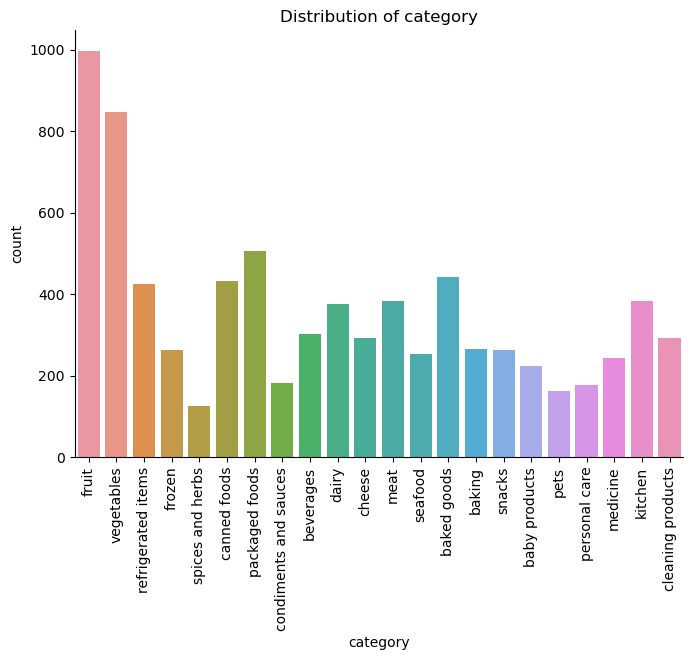

In [118]:
plot_continuous_distribution('category')

#### Findings
- Fruits and vegetables lead in sales, followed by packaged foods and baked goods, with personal care and pet products showing lower sales.

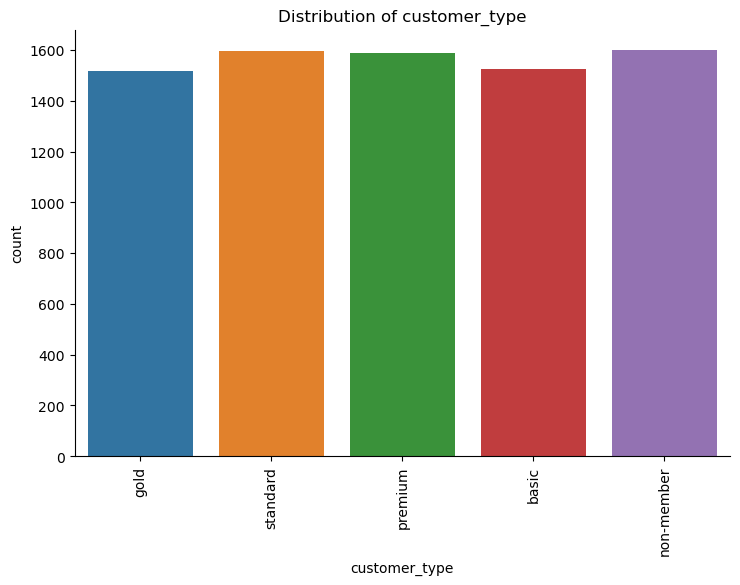

In [119]:
plot_continuous_distribution('customer_type')

#### Findings
- Customer type counts are similar, with non-members slightly ahead and gold members the least frequent.

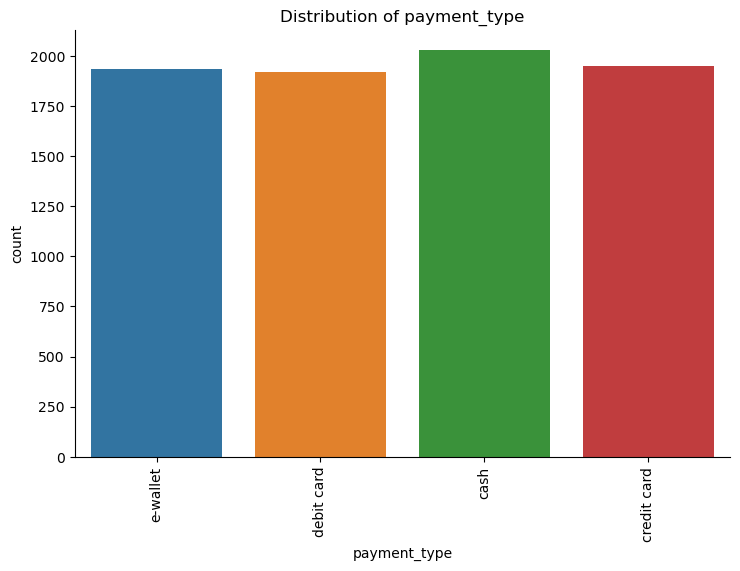

In [120]:
plot_continuous_distribution('payment_type')

#### Findings
- Cash is preferred, with credit cards, e-wallets, and debit cards used equally.

#### Transforming Object Type to Timestamp 

In [121]:
get_unique_values('timestamp')

Column: timestamp has 7738 unique values

timestamp
2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: count, Length: 7738, dtype: int64


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


#### Findings
- The column named timestamp appears to be categorical, but it is actually a datetime in the format YYYY-MM-DD HH:MM. 
- Therefore, we need to transform this column to reflect its true nature. i.e. Convert object data type to datetime64[ns] datatype.

In [129]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


#### Extract hour form timestamp and create hour column in dataset

In [131]:
df['hour'] = df['timestamp'].dt.hour
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [132]:
get_unique_values('hour')

Column: hour has 11 unique values

hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: count, dtype: int64


#### Findings
- 11 AM, 4 PM, and 6 PM are peak times for transactions, while 1 PM, 3 PM, and 5 PM are the quieter periods.

#### Correlation Matrix Analysis

In [134]:
df.corr(numeric_only=True)

,unit_price,quantity,total,hour
unit_price,1.000000,0.024588,0.792018,0.010842
quantity,0.024588,1.000000,0.521926,-0.008410
total,0.792018,0.521926,1.000000,0.010354
hour,0.010842,-0.008410,0.010354,1.000000


<Axes: >

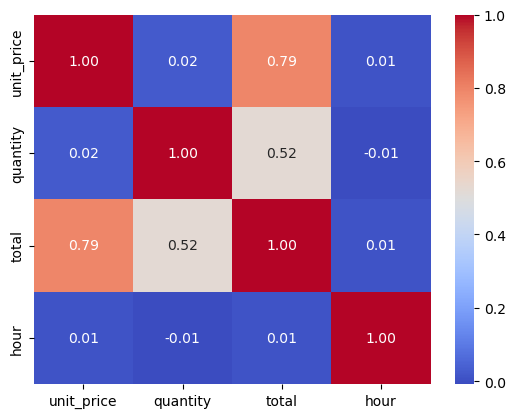

In [135]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')

#### Findings
- The most notable finding is the strong positive correlation between unit price and the total amount payable by the customer, indicating that higher-priced items contribute significantly to the total expenditure incurred by customers.